# Desci Token Network Distribution

The objective of this analysis is to determine the distribution of DESCI tokens across different L1 and L2 networks to provide actionable insights towards Bitcoin University's smart contract architecture design considerations. The JSON data `~/token-network-distribution/data/20251111.json` was manually collected from [CoinMarketCap](https://coinmarketcap.com/view/desci/) on November 12, 2025.

In [46]:
import pandas as pd
import os
import json

In [ ]:
# change directory to the parent directory in python
# run this once
#os.chdir("./git-repo/desci-analysis/token-network-distribution")
#!pwd

/home/alice/git-repo/desci-analysis/token-network-distribution


In [52]:
# import data/20251111.json
with open("data/20251111.json", "r") as f:
    data = json.load(f)
print(data)

{'tokens': [{'name': 'OriginTrail', 'symbol': 'TRAC', 'contracts': [{'address': '0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f', 'network': 'ethereum'}, {'address': '0xeddd81e0792e764501aae206eb432399a0268db5', 'network': 'gnosis'}, {'address': '0xA81a52B4dda010896cDd386C7fBdc5CDc835ba23', 'network': 'base'}], 'UCID': '2467'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'contracts': [{'address': '0xcb1592591996765ec0efc1f92599a19767ee5ffa', 'network': 'ethereum'}, {'address': 'bioJ9JTqW62MLz7UKHU69gtKhPpGi1BQhccj2kmSvUJ', 'network': 'solana'}, {'address': '0x226a2fa2556c48245e57cd1cba4c6c9e67077dd2', 'network': 'base'}], 'UCID': '34812'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'contracts': [{'address': 'HNg5PYJmtqcmzXrv6S9zP1CDKk5BgDuyFBxbvNApump', 'network': 'solana'}], 'UCID': '34880'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'contracts': [{'address': 'CreiuhfwdWCN5mJbMJtA9bBpYQrQF2tCBuZwSPWfpump', 'network': 'solana'}], 'UCID': '35216'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'cont

In [53]:
# create a dataframe from the data
# where each row is a token
# and the columns are the token's name, symbol, and network
# tokens can have multiple networks
# so each token will have multiple rows
clean_data = []
for token in data["tokens"]:
    #create row for each network
    name = token["name"]
    symbol = token["symbol"]
    for network in token["contracts"]:
        clean_data.append({"name": name, "symbol": symbol, "network": network["network"]})

print(clean_data[:10])
# convert list of dictionaries to dataframe
df = pd.DataFrame(clean_data)
df.head()


[{'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'ethereum'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'gnosis'}, {'name': 'OriginTrail', 'symbol': 'TRAC', 'network': 'base'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'ethereum'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'solana'}, {'name': 'Bio Protocol', 'symbol': 'BIO', 'network': 'base'}, {'name': 'Alchemist AI', 'symbol': 'ALCH', 'network': 'solana'}, {'name': 'Pythia', 'symbol': 'PYTHIA', 'network': 'solana'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'ethereum'}, {'name': 'ResearchCoin', 'symbol': 'RSC', 'network': 'base'}]


,name,symbol,network
0,OriginTrail,TRAC,ethereum
1,OriginTrail,TRAC,gnosis
2,OriginTrail,TRAC,base
3,Bio Protocol,BIO,ethereum
4,Bio Protocol,BIO,solana


In [55]:
# the number of unique tokens
print("The number of unique tokens is: ", len(df["symbol"].unique()))

The number of unique tokens is:  31


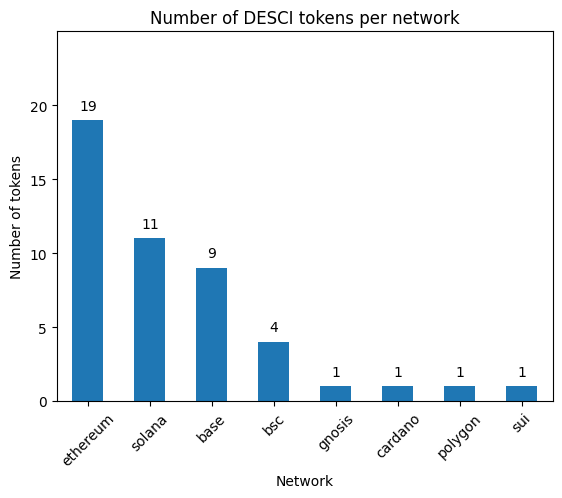

In [54]:
# create a bar chart of the number of tokens per network
import matplotlib.pyplot as plt
df["network"].value_counts().plot(kind="bar")
# ylim to 25
plt.ylim(0, 25)
# y axis labels every 5
plt.yticks(range(0, 25, 5))
# add annotation to the bars
for i, v in enumerate(df["network"].value_counts()):
    plt.text(i, v + 0.5, str(v), ha="center", va="bottom")
# rotate x axis labels 45 degrees
plt.xticks(rotation=45)
plt.title("Number of DESCI tokens per network")
plt.xlabel("Network")
plt.ylabel("Number of tokens")
plt.show()
